<h1><center>Matplotlib</center></h1>

![](https://matplotlib.org/stable/_static/images/logo_dark.svg)

# Matplotlib: Visualization with Python
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

- Create publication quality plots.
- Make interactive figures that can zoom, pan, update.
- Customize visual style and layout.
- Export to many file formats.
- Embed in JupyterLab and Graphical User Interfaces.
- Use a rich array of third-party packages built on Matplotlib.

# Table of Contents

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

# Importing data 

In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [75]:
df = pd.read_csv('data/iris.csv')

In [80]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [84]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

x = le.fit_transform(df['species'])

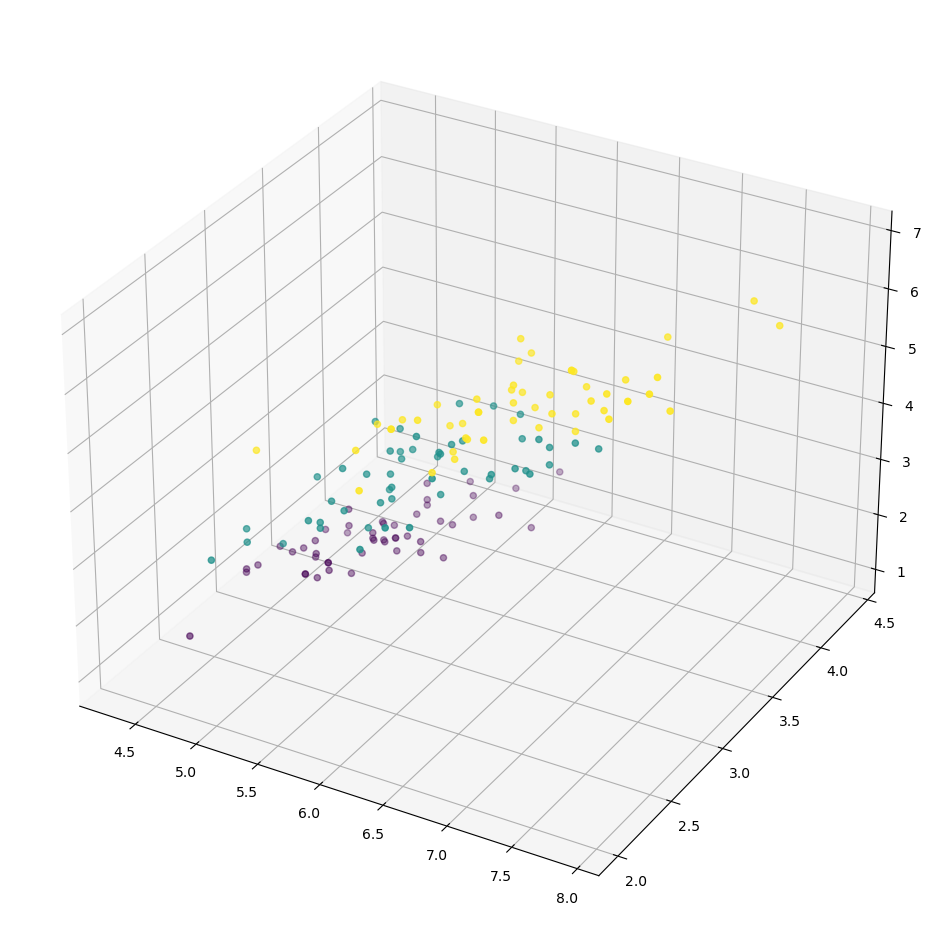

In [85]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'],c=x)
plt.show()

Matplotlib graphs your data on ```Figures```, each of which can contain one or more ```Axes```, an area where points can be specified in terms of x-y coordinates. 

- The simplest way of creating a ```Figure``` with an ```Axes``` is using ```pyplot.subplots```. 
- We can then use ```Axes.plot``` to draw some data on the ```Axes```:

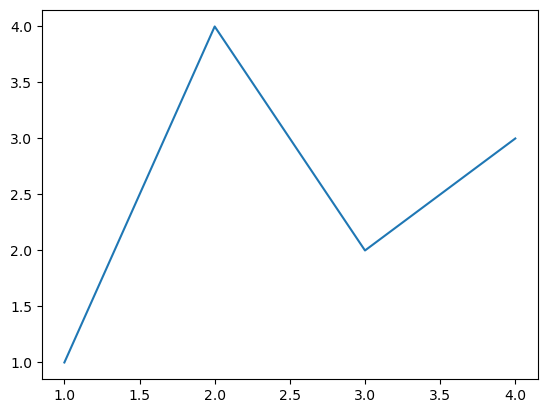

In [5]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

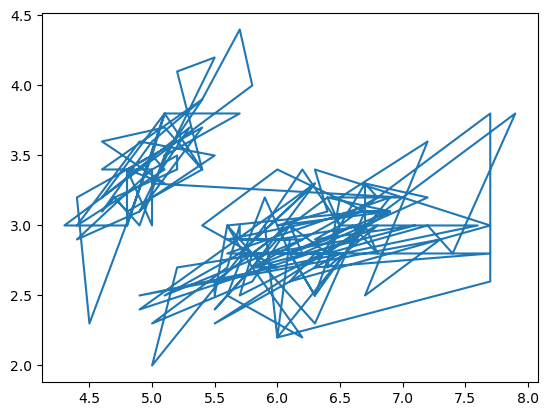

In [6]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(df['sepal_length'], df['sepal_width'])  # Plot iris data on the axes.

# Parts of a Figure
Here are the components of a Matplotlib ```Figure```.

![](https://matplotlib.org/stable/_images/anatomy.png)

# Figure
The Figure keeps track of all the child ```Axes```, a group of 'special' Artists (```titles```, ```figure legends```, ```colorbars```, etc), and even nested ```subfigures```.

- The easiest way to create a new ```Figure``` is with ```pyplot()```:

### an empty figure with no Axes

In [8]:
# an empty figure with no Axes
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

### a figure with a single Axes

Text(0.5, 1.0, 'This is title')

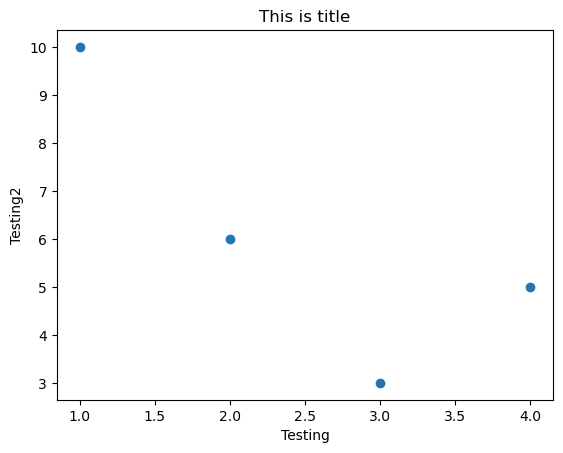

In [24]:
# an empty figure with no Axes
fig, ax = plt.subplots()
ax.set_xlabel('Testing')
ax.set_ylabel('Testing2')
ax.scatter([1,2,3,4],[10,6,3,5])
ax.set_title('This is title')

### a figure with a 1x2 grid of Axes

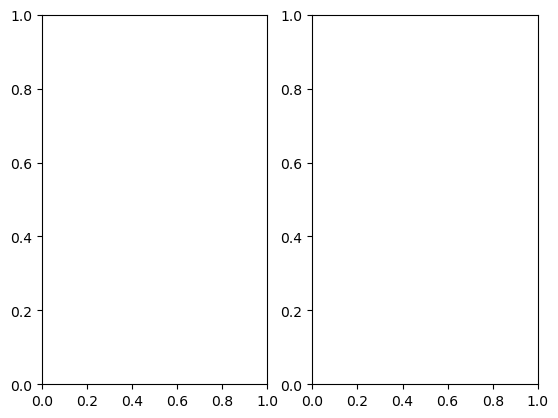

In [13]:
# a figure with a 1x2 grid of Axes
fig, axs = plt.subplots(1, 2)

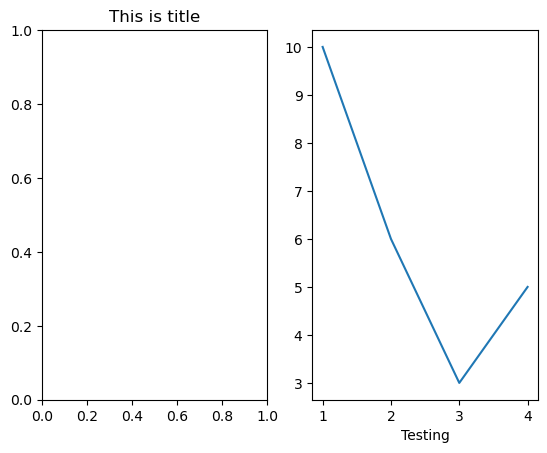

In [18]:
# a figure with a 1x2 grid of Axes
fig, axs = plt.subplots(1, 2)
axs[0].set_title('This is title')
axs[1].set_xlabel('Testing')
axs[1].plot([1,2,3,4],[10,6,3,5])

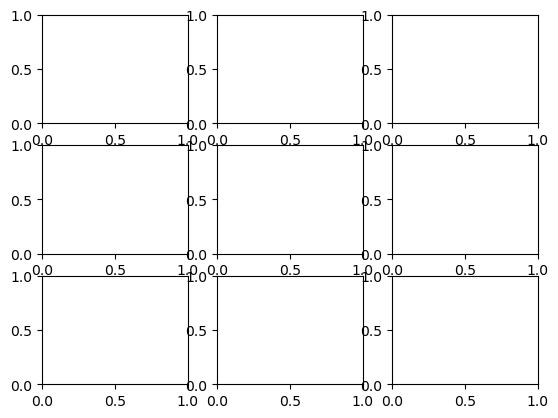

In [23]:
# a figure with a 1x2 grid of Axes
fig, axs = plt.subplots(3, 3)

### a figure with one axes on the left, and two on the right:

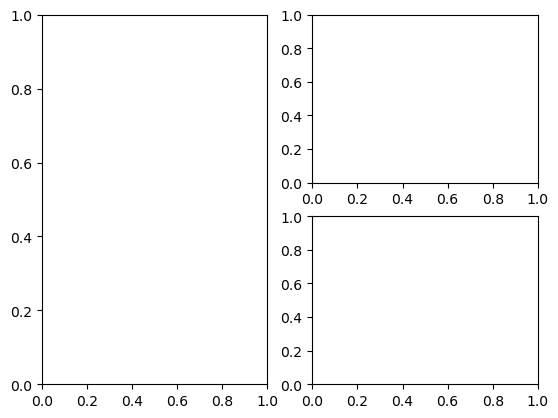

In [23]:
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right-top'],['left', 'right_bottom']])

### Everything together

<Figure size 640x480 with 0 Axes>

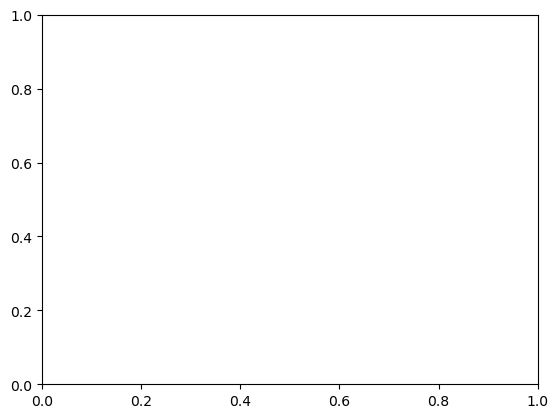

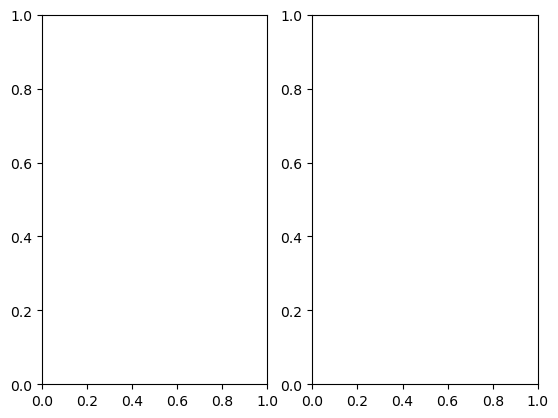

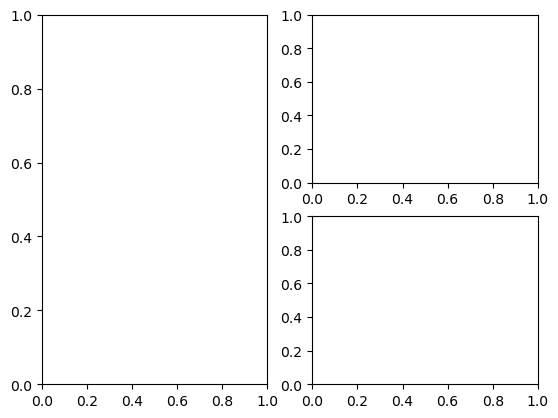

In [24]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(1, 2)  # a figure with a 1x2 grid of Axes


# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right-top'],['left', 'right_bottom']])

It is often convenient to create the ```Axes``` together with the ```Figure```, but you can also manually add ```Axes``` later on. 

---

# Axes
An ```Axes``` is an Artist attached to a ```Figure``` that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between ```Axes``` and Axis) that provide ```ticks``` and ```tick labels``` to provide scales for the data in the ```Axes```. 

Each ```Axes``` also has a 
- ```title``` set via ```set_title()```
- an ```x-label``` set via ```set_xlabel()```
- a ```y-label``` set via ```set_ylabel()```

# Axis
These objects set the ```scale``` and ```limits``` and ```generate ticks``` (the marks on the Axis) and ```ticklabels``` (strings labeling the ticks). The location of the ```ticks``` is determined by a ```Locator``` object and the ```ticklabel``` strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the ```tick locations``` and ```labels```.

# Artist
Basically, everything visible on the ```Figure``` is an Artist (even ```Figure```, ```Axes```, and ```Axis``` objects). This includes ```Text``` objects, ```Line2D``` objects, collections objects, ```Patch``` objects, etc.

When the ```Figure``` is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an ```Axes```; such an Artist cannot be shared by multiple ```Axes```, or moved from one to another.

# Types of inputs to plotting functions
Plotting functions expect ```numpy.array``` as input, or objects that can be passed to ```numpy.asarray```. 
- Common convention is to convert these to ```numpy.array``` objects prior to plotting.

In [25]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

In [26]:
b_asarray

array([[1, 2],
       [3, 4]])

Most methods will also parse an addressable object like a ```dict```, a ```numpy.recarray```, or a ```pandas.DataFrame```. 

```Matplotlib``` allows you to provide the data keyword argument and generate plots passing the strings corresponding to the ```x``` and ```y``` variables.

In [27]:
import pandas as pd

In [28]:
df = pd.DataFrame({'a':[1,2,3,4,3], 'b':[10,15,8,25,17], 
                   'c': [52,48,39,61,43], 'd': [12,8,10,19,8]})

In [29]:
df

,a,b,c,d
0,1,10,52,12
1,2,15,48,8
2,3,8,39,10
3,4,25,61,19
4,3,17,43,8


Text(0, 0.5, 'entry b')

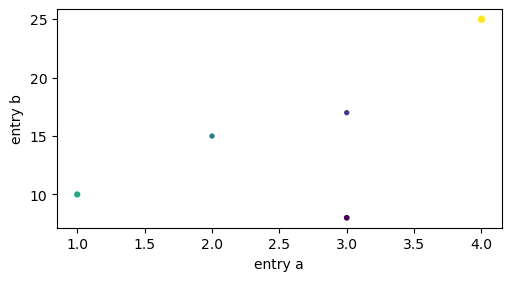

In [30]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=df)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

<h1><center>Coding styles</center></h1>

# The explicit and the implicit interfaces
As noted above, there are essentially two ways to use Matplotlib:

1. Explicitly create ```Figures``` and ```Axes```, and call methods on them (the "object-oriented (OO) style").

2. Rely on ```pyplot``` to implicitly create and manage the ```Figures``` and ```Axes```, and use ```pyplot``` functions for plotting.

### So one can use the OO-style

In [31]:
# Sample data.
x = np.linspace(0, 2, 100)
x

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

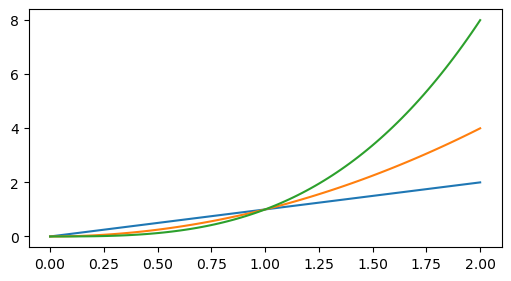

In [33]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.

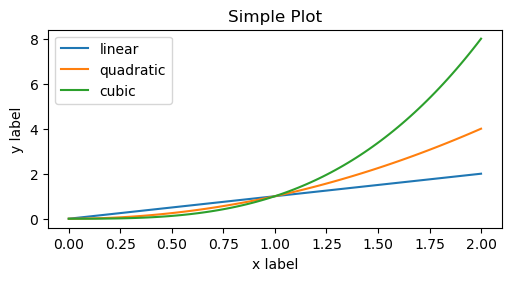

In [34]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

### or the pyplot-style:

In [35]:
# Sample data.
x = np.linspace(0, 2, 100)
x

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

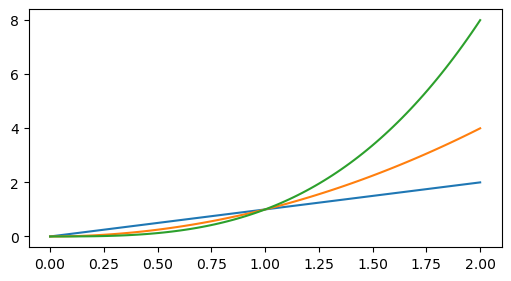

In [38]:
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')

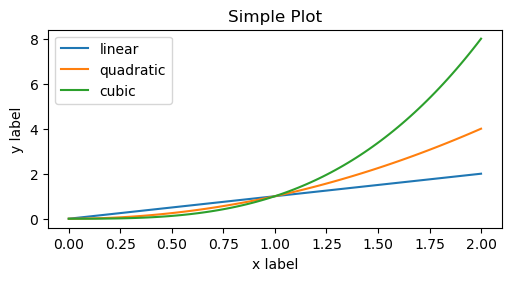

In [39]:
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

# Styling Artists
Most plotting methods have styling options for the ```Artists```, accessible either when a plotting method is called, or from a "setter" on the Artist. 

In the plot below we manually set the ```color```, ```linewidth```, and ```linestyle``` of the Artists created by plot, and we set the ```linestyle``` of the second line after the fact with ```set_linestyle```.

### Creating data

In [44]:
# data1, data2, data3, data4 = np.random.randn(4, 100) 
data1 = np.random.randn(100) 
data2 = np.random.randn(100) 
data3 = np.random.randn(100) 
data4 = np.random.randn(100) 

In [45]:
data1

array([ 1.00326153, -0.9228532 ,  0.10953158,  1.14061228, -1.07927296,
        1.1603567 ,  0.85746445, -0.85644575,  1.81367386, -0.89424946,
       -0.5313026 , -0.58322408,  0.68815418,  1.24005223,  2.51091785,
        0.08743218, -0.01474626, -0.80767983,  1.23026995,  2.52498166,
       -0.84667009, -0.30523961, -0.06758878, -1.02868938, -0.45198673,
        0.5022579 ,  0.76146956, -0.28026418,  1.14053952,  0.32565958,
       -0.86380365, -0.39951268, -0.05086689, -2.24041227,  1.70177823,
       -0.66683273, -0.30627158, -0.47296923, -2.14662471,  1.32179467,
       -0.46414256,  0.41202711, -0.98461918,  0.03329904,  1.53575066,
        0.09118419,  0.79837365, -0.97692483, -0.92161776, -1.3126794 ,
       -0.09799645,  1.41356341,  1.5789199 ,  1.06639879, -1.16725844,
        1.59229522,  0.92721014, -0.18927126,  1.11026775, -0.04392505,
        1.12160947,  0.16676943, -0.4662819 , -0.18895023, -2.05085951,
       -1.36348103, -0.76965253,  0.82534756,  0.22645851, -0.39

In [47]:
data2

array([-0.49278418, -1.3123568 ,  1.86534995, -1.06207888, -0.40772067,
       -2.26430679, -0.09143749, -1.34285176,  0.08142163, -1.53903636,
        0.82501605, -0.954924  , -0.27614251,  0.76914364, -0.48303186,
       -0.1313696 ,  0.20592095,  0.3669878 , -0.4540788 ,  1.50223845,
       -0.03253643, -1.06748626, -0.44318485,  0.35938683,  0.83475117,
       -0.7660539 ,  0.28562162,  0.37176449,  0.55278671, -0.71003053,
       -1.06984221,  0.80570488, -0.00689358, -0.2849703 , -0.86637645,
       -0.12831961, -0.50734789,  1.41275921, -0.56480238,  0.66262221,
        0.47499955, -0.86249421, -1.05224825,  2.29249502,  1.54848957,
        1.08083724, -0.28816406, -0.1962916 ,  0.22129087,  0.21535347,
        1.08954135,  0.75415167,  0.80865412,  0.67273868,  0.56494549,
        0.48991748, -0.82599049, -2.09743364, -0.39627684, -0.76000345,
        1.74534157, -0.52076742, -0.36501704, -0.02295291, -1.06961209,
       -0.52458961, -0.88776713,  1.39424671,  1.07129726,  1.52

In [48]:
x = np.arange(len(data1))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

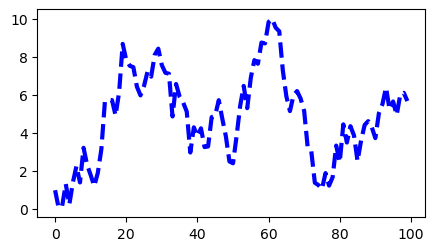

In [49]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')

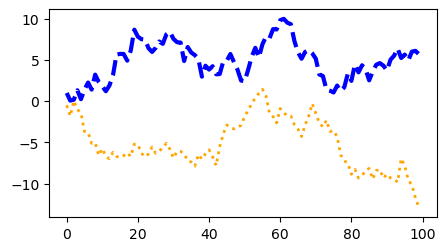

In [50]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')

l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

# Colors
Matplotlib has a very flexible array of ```colors``` that are accepted for most ```Artists```; Some ```Artists``` will take multiple colors. i.e. for a ```scatter``` plot, the edge of the ```markers``` can be different ```colors``` from the interior:

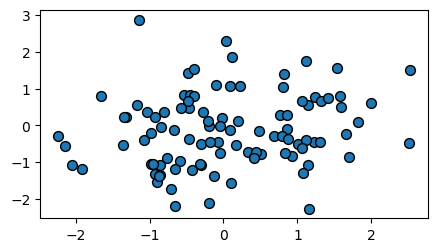

In [51]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

# Linewidths, linestyles, and markersizes
```Line widths``` are typically in typographic points (1 pt = 1/72 inch) and available for ```Artists``` that have stroked lines. Similarly, stroked lines can have a ```linestyle```. See the linestyles example.

Marker size depends on the method being used ```.plot``` specifies ```markersize``` in points, and is generally the "```diameter```" or width of the ```marker```. ```scatter``` specifies ```markersize``` as approximately proportional to the visual area of the ```marker```.

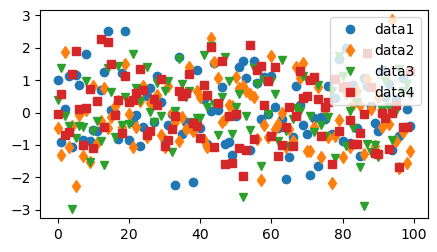

In [52]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

# Labelling plots

# Axes labels and text
```set_xlabel```, ```set_ylabel```, and ```set_title``` are used to add text in the indicated locations. Text can also be directly added to plots using text:

In [55]:
mu = 115
sigma = 15
x = mu + sigma * np.random.randn(10000)
x

array([115.80895712, 113.30169409, 142.16984726, ..., 105.24317603,
       119.17000885, 138.59256998])

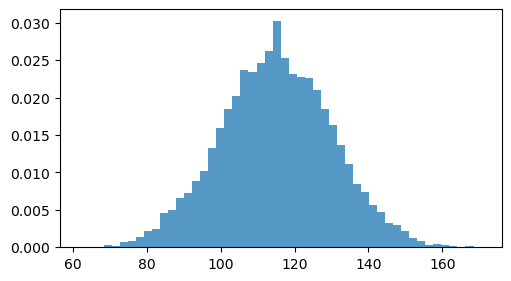

In [57]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

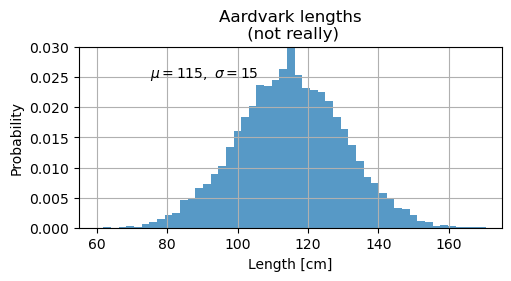

In [58]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

All of the text functions return a ```matplotlib.text.Text``` instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:

In [59]:
mu = 115
sigma = 15
x = mu + sigma * np.random.randn(10000)
x

array([121.60702837, 129.7154456 , 138.1580105 , ..., 105.90773436,
       124.50788503, 122.95821277])

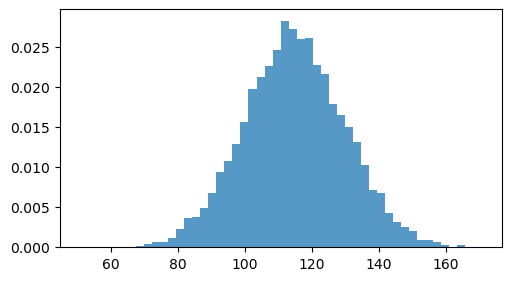

In [62]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

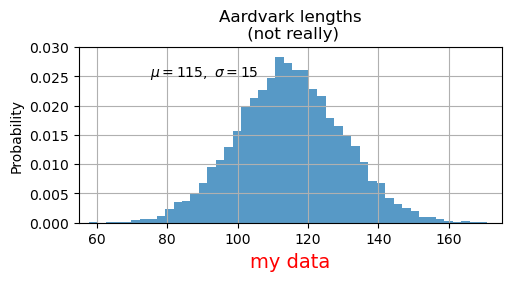

In [63]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

t = ax.set_xlabel('my data', fontsize=14, color='red')

# Legends
Often we want to identify ```lines``` or ```markers``` with a ```Axes.legend```:

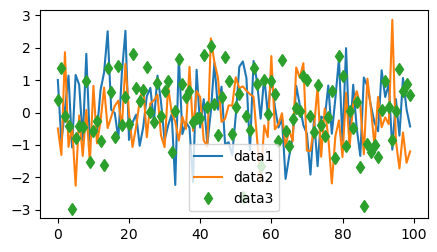

In [64]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

# Axis scales and ticks
Each ```Axes``` has two (or three) ```Axis``` objects representing the ```x-axis``` and ```y-axis```. These control the scale of the ```Axis```, the ```tick locators``` and the ```tick formatters```.

# Scales
In addition to the ```linear scale```, Matplotlib supplies ```non-linear scales```, such as a ```log-scale```. Since ```log-scales``` are used so much there are also direct methods like ```loglog```, ```semilogx```, and ```semilogy```.

In [68]:
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1

In [69]:
xdata

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [70]:
data

array([1.00753821e+01, 1.19439176e-01, 1.28686082e+00, 1.38233174e+01,
       8.33157369e-02, 1.44662744e+01, 7.20218797e+00, 1.39172762e-01,
       6.51139230e+01, 1.27570583e-01, 2.94237077e-01, 2.61081394e-01,
       4.87701601e+00, 1.73800982e+01, 3.24278272e+02, 1.22301611e+00,
       9.66615459e-01, 1.55711313e-01, 1.69929959e+01, 3.34951293e+02,
       1.42340965e-01, 4.95176920e-01, 8.55876730e-01, 9.36074946e-02,
       3.53193964e-01, 3.17876116e+00, 5.77390405e+00, 5.24488317e-01,
       1.38210016e+01, 2.11670133e+00, 1.36834732e-01, 3.98554139e-01,
       8.89473696e-01, 5.74893936e-03, 5.03243564e+01, 2.15361103e-01,
       4.94001669e-01, 3.36535409e-01, 7.13469293e-03, 2.09794775e+01,
       3.43445195e-01, 2.58242140e+00, 1.03605026e-01, 1.07968990e+00,
       3.43360758e+01, 1.23362793e+00, 6.28598953e+00, 1.05456942e-01,
       1.19779428e-01, 4.86766412e-02, 7.98001217e-01, 2.59157279e+01,
       3.79245028e+01, 1.16519547e+01, 6.80364365e-02, 3.91106670e+01,
      

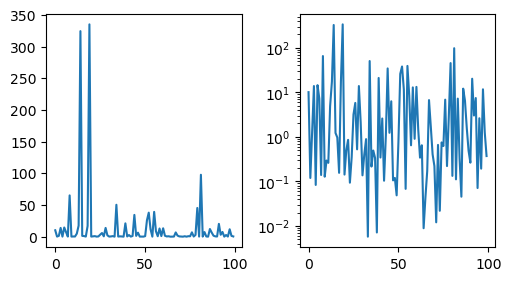

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')

axs[0].plot(xdata, data)
axs[1].set_yscale('log')
axs[1].plot(xdata, data)

The ```scale``` sets the mapping from data values to spacing along the ```Axis```. This happens in both directions, and gets combined into a transform, which is the way that Matplotlib maps from data coordinates to ```Axes```, ```Figure```, or ```screen coordinates```. 

# Tick locators and formatters
Each ```Axis``` has a ```tick locator``` and ```formatter``` that choose where along the ```Axis``` objects to put ```tick marks```. A simple interface to this is ```set_xticks```:

Text(0.5, 1.0, 'Manual ticks')

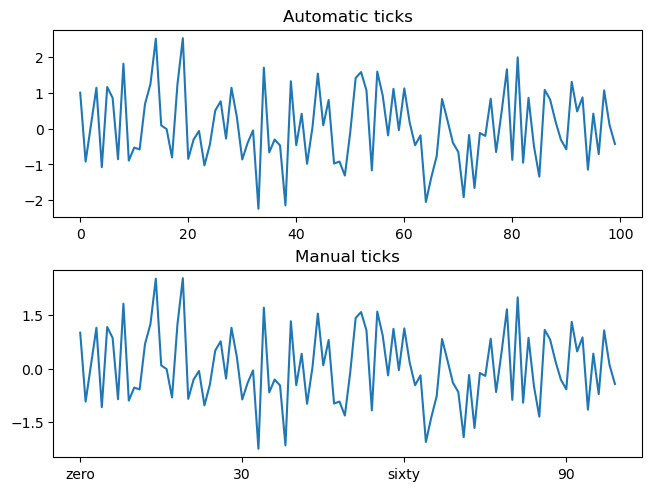

In [72]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

Different ```scales``` can have different ```locators``` and ```formatters```; for instance the ```log-scale``` above uses ```LogLocator``` and ```LogFormatter```.

# Working with multiple Figures and Axes
You can open multiple ```Figures``` with multiple calls to ```fig = plt.figure()``` or ```fig2, ax = plt.subplots()```. By keeping the object references you can add ```Artists``` to either ```Figure```.

Multiple ```Axes``` can be added a number of ways, but the most basic is ```plt.subplots()``` as used above. One can achieve more complex layouts, with ```Axes``` objects spanning ```columns``` or ```rows```, using ```subplot_mosaic```.

Text(0.5, 1.0, 'right')

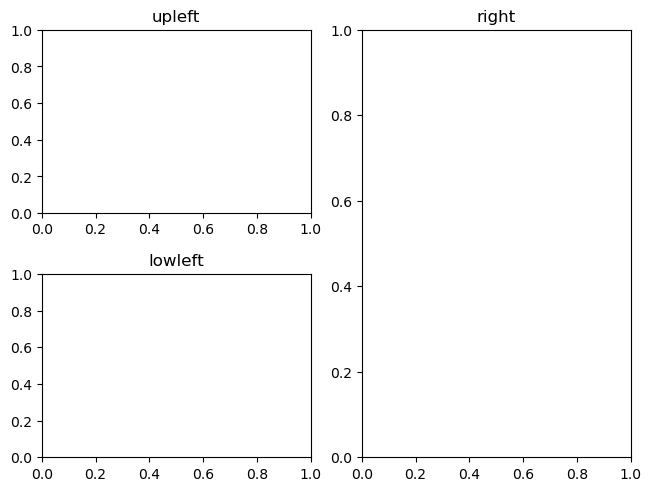

In [73]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')